In [2]:
import tensorflow as tf
import cv2 
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("train/0/Training_3908.jpg")

In [3]:
img_array.shape

(48, 48, 3)

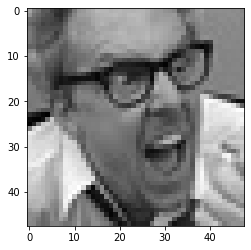

In [4]:
plt.imshow(img_array)

In [5]:
Datadirectory="train/"

In [6]:
Classes=["0","1","2","3","4","5"]

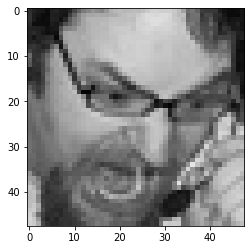

In [7]:
for category in Classes:
    path=os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array =cv2.imread(os.path.join(path,img))
        
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break
    

<function matplotlib.pyplot.show(close=None, block=None)>

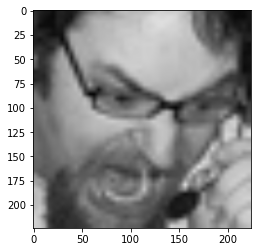

In [8]:
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show

In [9]:
training_Data=[]

def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception  as e:
                pass
            
                

In [10]:
create_training_Data()

In [11]:
print(len(training_Data))


28665


In [12]:
import random
random.shuffle(training_Data)

In [13]:
X=[]
y=[]

for features, labels in training_Data:
    X.append(features)
    y.append(labels)
X=np.array(X).reshape(-1,img_size,img_size,3)   #converting to 4D
y = np.array(y)

In [14]:
X.shape

(28665, 224, 224, 3)

# deep learning model for training 

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
runoptics=tf.compat.v1.RunOptions(report_tensor_allocations_upon_oom=True)

In [16]:
model = tf.keras.applications.MobileNetV2()

In [17]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

# transfer learning

In [18]:
base_input =model.layers[0].input

In [19]:
base_input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [20]:
base_output =model.layers[-2].output

In [21]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [22]:
final_output=layers.Dense(128)(base_output)
final_output=layers.Activation('relu')
final_output=layers.Dense(64)(base_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(7,activation='softmax')(final_output)


In [23]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [24]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [25]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [26]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [27]:
checkpoint_path ="train/cp.ckpt"
checkpoint_dir=os.path.dirname(checkpoint_path)

cp_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,verbose=1)

In [30]:
new_model.fit(X,y,batch_size=15,epochs=30,verbose=1)

Epoch 1/30
1911/1911 [==============================] - 333s 167ms/step - loss: 1.3016 - accuracy: 0.4881
Epoch 2/30
1911/1911 [==============================] - 338s 177ms/step - loss: 1.1401 - accuracy: 0.5593
Epoch 3/30
1911/1911 [==============================] - 350s 183ms/step - loss: 1.0677 - accuracy: 0.5844
Epoch 4/30
1911/1911 [==============================] - 350s 183ms/step - loss: 1.0129 - accuracy: 0.6112
Epoch 5/30
1911/1911 [==============================] - 357s 187ms/step - loss: 0.9634 - accuracy: 0.6334 - loss: 0.963
Epoch 6/30
1911/1911 [==============================] - 348s 182ms/step - loss: 0.9103 - accuracy: 0.6534
Epoch 7/30
1911/1911 [==============================] - 352s 184ms/step - loss: 0.8595 - accuracy: 0.6760
Epoch 8/30
1911/1911 [==============================] - 356s 186ms/step - loss: 0.8087 - accuracy: 0.6957
Epoch 9/30
1911/1911 [==============================] - 356s 186ms/step - loss: 0.7567 - accuracy: 0.7147
Epoch 10/30
1911/1911 [=========

In [31]:
new_model.save("balancedDataTrain1.h5")

C:\Users\Harsh Mehta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [3]:
new_model=tf.keras.models.load_model('balancedDataTrain1.h5')

In [ ]:
cv2.ocl.setUseOpenCL(False)
emotion_dict = {0: "angry", 2: "fear", 3: "Happy", 4: "neutral", 5: "Sad", 1: "Surprise"}
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        print('here')
        break
    bounding_box = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    num_faces = bounding_box.detectMultiScale(gray_frame,scaleFactor=1.3, minNeighbors=5)
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (224, 224)), -1), 0)
        emotion_prediction = new_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        emotion_conf = f'{round(np.max(emotion_prediction)*100)}%'
        cv2.putText(frame, f'{emotion_dict[maxindex]}:{emotion_conf}', (x, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.imshow('Video', cv2.resize(frame,(1200,860),interpolation = cv2.INTER_CUBIC))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()